In [159]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.stats import norm

path = "../Data/Figure2/2023-09-20 data.xlsx"

df = pd.read_excel(path)
time_list = df['Time (h)'].to_list()
L = df['Length(mm)'].to_list()
smth_L = df['Smth_L (mm)'].to_list()
G = df['Growth rate (mm/h)'].to_list()
smth_G = df['Smth_G (mm/h)'].to_list()

print('DONE')

DONE


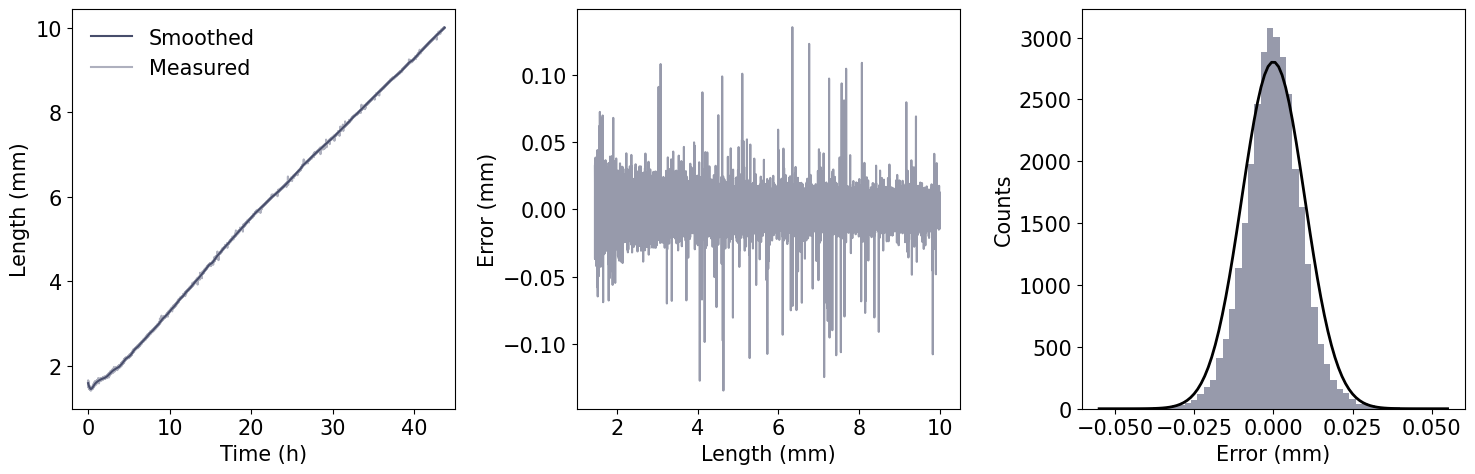

mean -0.000, std: 0.010


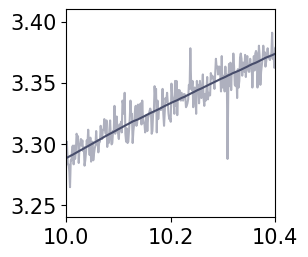

In [160]:
save_option = True
figsavepath1 = "../Figures/FigureS8_smoothed-length.svg"
figsavepath2 = "../Figures/FigureS8_smoothed-length_inset.svg"
figsavepath3 = "../Figures/FigureS9_growth-rate-smoothing.svg"

plt.rcParams["font.size"] = 15
fig, axes = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(15,5))

color1 = "#474D6B" # dark blue
color2 = '#3498B0' # light blue

ax0 = axes[0]
ax0.plot(time_list,smth_L,c=f'{color1}',zorder=2,label='Smoothed')
ax0.plot(time_list,L,c=f'{color1}70',zorder=1,label='Measured')
ax0.set_xlabel('Time (h)')
ax0.set_ylabel('Length (mm)')
ax0.set_xlim(-2,45)
ax0.legend(frameon=False)

ax1 = axes[1]
errors = [m-n for m,n in zip(L,smth_L)]
ax1.plot(smth_L,errors,c=f'{color1}90')
ax1.set_xlabel('Length (mm)')
ax1.set_xlim(1,10.5)
# ax1.set_ylim(-0.05,0.05)
ax1.set_ylabel('Error (mm)')


ax2 = axes[2]
bin_width = 0.002
bin_edges = np.arange(start=-0.05, stop=0.05 + bin_width, step=bin_width)
ax2.hist(errors,bins = bin_edges,color=f'{color1}90',label='data')
mean = np.mean(errors)
std = np.std(errors)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
ax2.plot(x, [n*2800/max(p) for n in p], 'k', linewidth=2, label='Fit')
ax2.set_xlabel('Error (mm)')
ax2.set_ylabel('Counts')

if save_option:
    plt.savefig(figsavepath1, dpi=1200, bbox_inches='tight')
    
plt.show()

print(f'mean {mean:.3f}, std: {std:.3f}')

plt.rcParams["font.size"] = 15
fig = plt.figure(figsize=(2.7,2.7))
plt.plot(time_list,smth_L,c=f'{color1}',zorder=2,label='Smoothed')
plt.plot(time_list,L,c=f'{color1}70',zorder=1,label='Measured')

plt.xlim(10,10.4)
plt.ylim(3.24,3.41)
# plt.xticks(np.arange(10,11.5,0.5))
# plt.yticks(np.arange(3.25,3.65,0.1))
if save_option:
    plt.savefig(figsavepath2, dpi=1200, bbox_inches='tight')
plt.show()

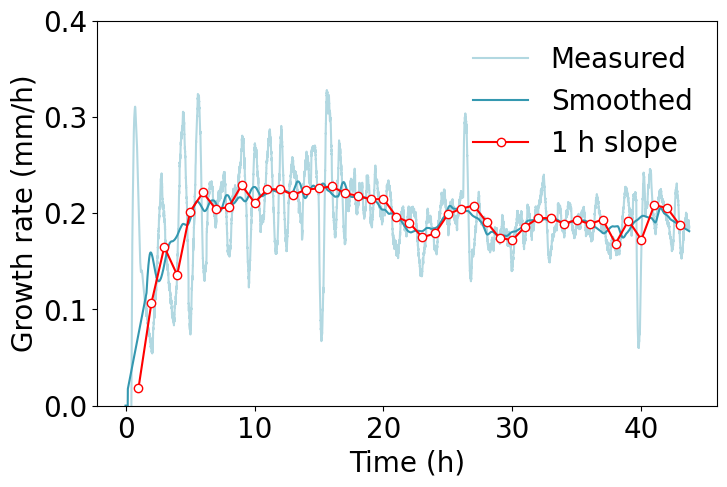

In [161]:
plt.rcParams["font.size"] = 20
fig = plt.figure(figsize=(8,5))

plt.plot(time_list,G,c=f'{color2}60',label='Measured')
plt.plot(time_list,smth_G,c=f'{color2}',label='Smoothed')

intervals = [60] #min

for interval in intervals:
    i = 0
    check_T, check_indice, check_R = [], [], []
    for t, l in zip(time_list,smth_L):
        if t > i:
            check_T.append(t)
            check_indice.append(time_list.index(t))
            i += interval/60

    new_T, new_R = [], []
    for k in range(len(check_indice)-1):
        new_T.append(time_list[check_indice[k+1]])
        new_R.append((smth_L[check_indice[k+1]]-smth_L[check_indice[k]])/interval*60)
    plt.plot(new_T,new_R,label=f'{interval/60:.0f} h slope',marker='o',c='red',mfc='white')
plt.legend(frameon=False)
plt.ylim(0,0.4)
plt.xlabel('Time (h)')
plt.ylabel('Growth rate (mm/h)')
if save_option:
    plt.savefig(figsavepath3, dpi=1200, bbox_inches='tight')
plt.show()